Dataset yang digunakan berdasarkan dari Steam Store Games (Clean Dataset) : https://www.kaggle.com/datasets/nikdavis/steam-store-games/data

Dataset mencakup semua game dari steam yang pernah di release sampai tahun 2019, dengan size dataset berjumlah sekitar 27 ribu data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
data = pd.read_csv("steam.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Terdapat 18 total fitur yang terdapat dalam dataset. Pada percobaan awal akan dipilih fitur - fitur berikut untuk membuat rekomendasi game populer berdasarkan genre dari Steam :
1. **genres** -> untuk filtering
2. **positive_ratings & negative_ratings** -> untuk mengecek popularitas game
3. **average_playtime** -> menunjukan tingkat replayability, bisa mengacu pada popularitas game juga
4. **price** -> dimasukan karena asumsi bahwa harga dari suatu game juga berpengaruh seberapa populer game (banyak case dimana game dengan harga lebih murah dapat membawakan lebih banyak user/pemain)

In [ ]:
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Data Preparation (one hot encoding untuk genre game)

In [ ]:
# Mengonversi string menjadi list (misalnya "Action, RPG" menjadi ['Action', 'RPG'])
data['genres'] = data['genres'].apply(lambda x: x.split(';') if isinstance(x, str) else x)
print(data['genres'].head())

0    [Action]
1    [Action]
2    [Action]
3    [Action]
4    [Action]
Name: genres, dtype: object


In [ ]:
# Memisahkan genre berdasarkan tanda titik koma (;)
data['genres'] = data['genres'].apply(lambda x: x.split(';') if isinstance(x, str) else x)

# Memastikan hasil pemisahan
print(data['genres'].head(79))


0                           [Action]
1                           [Action]
2                           [Action]
3                           [Action]
4                           [Action]
                   ...              
74    [Action, Simulation, Strategy]
75            [Simulation, Strategy]
76            [Simulation, Strategy]
77              [Action, Simulation]
78                        [Strategy]
Name: genres, Length: 79, dtype: object


one hot encoding

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Inisialisasi MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Terapkan One-Hot Encoding pada kolom 'genres' dan simpan hasilnya ke dalam DataFrame baru
encoded_genres = mlb.fit_transform(data['genres'])

# Convert hasilnya ke DataFrame dengan nama kolom berdasarkan genre yang ada
encoded_df = pd.DataFrame(encoded_genres, columns=mlb.classes_)

# Gabungkan hasil One-Hot Encoding ke dalam DataFrame asli
data_encoded = pd.concat([data, encoded_df], axis=1)

# Menampilkan beberapa baris data hasil encoding
print(data_encoded.head(79))

    appid                       name release_date  english         developer  \
0      10             Counter-Strike   2000-11-01        1             Valve   
1      20      Team Fortress Classic   1999-04-01        1             Valve   
2      30              Day of Defeat   2003-05-01        1             Valve   
3      40         Deathmatch Classic   2001-06-01        1             Valve   
4      50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   
..    ...                        ...          ...      ...               ...   
74   2820        X3: Terran Conflict   2008-10-16        1           Egosoft   
75   2840     X: Beyond the Frontier   2010-10-08        1           Egosoft   
76   2850                 X: Tension   2010-10-08        1           Egosoft   
77   2870                  X Rebirth   2013-11-15        1           Egosoft   
78   2900       688(I) Hunter/Killer   2006-10-26        1         Sonalysts   

         publisher          platforms  

Pada tahap ini akan dilakukan EDA untuk memulai analisis data

## Univariate Analysis

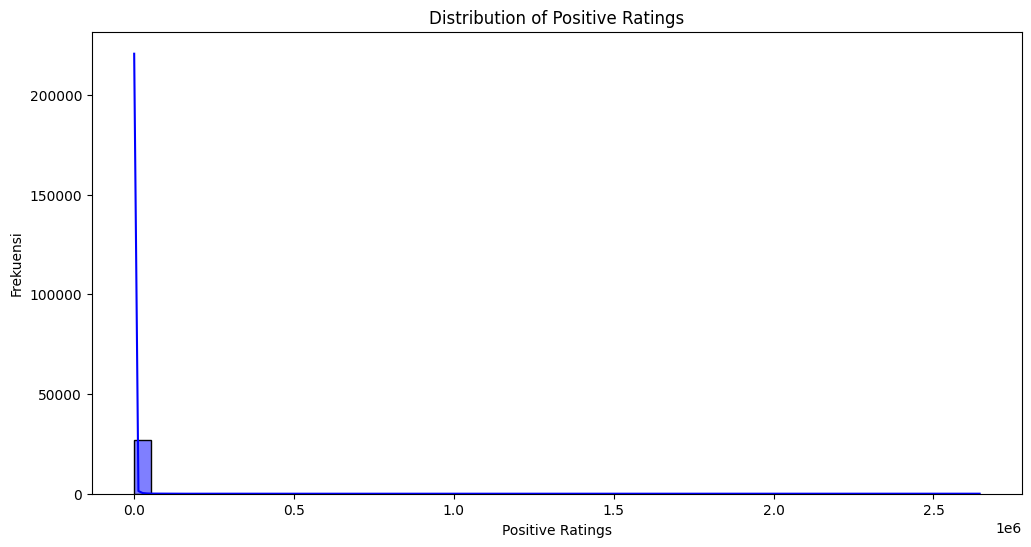

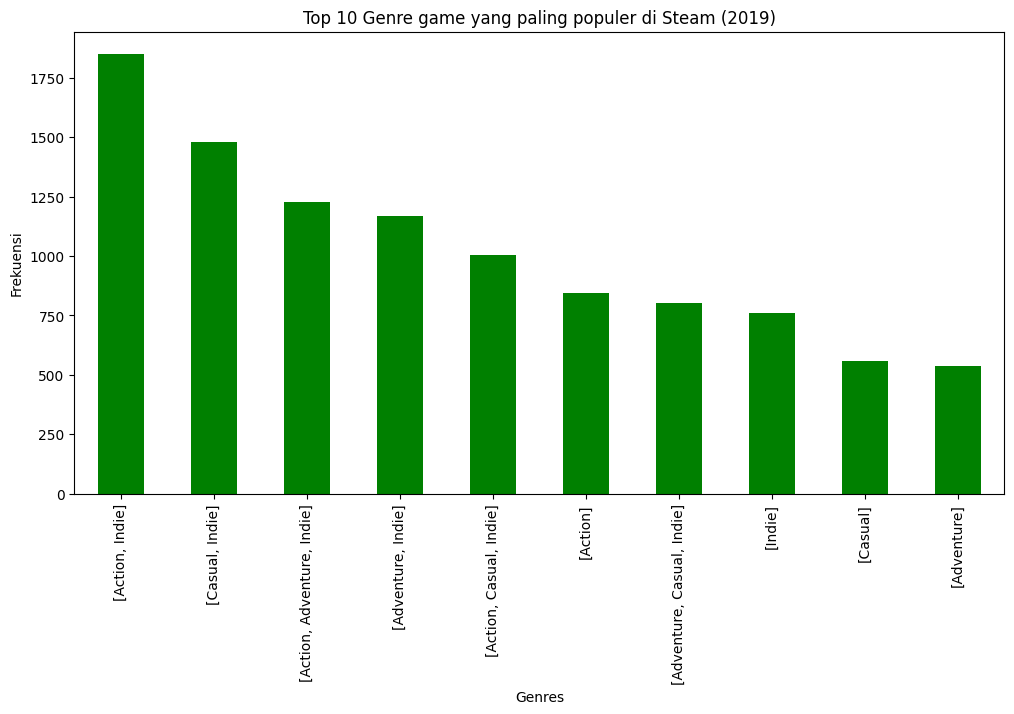

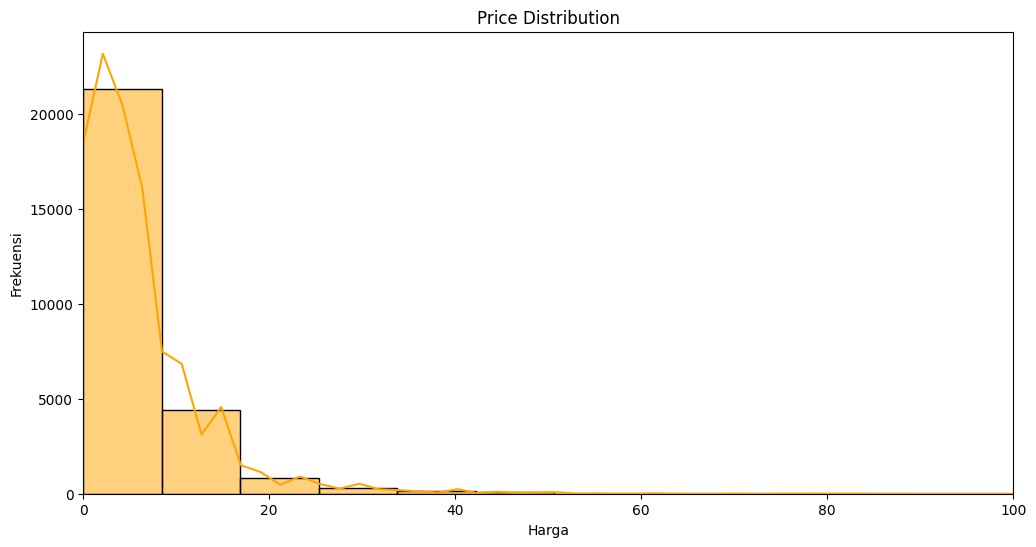

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'release_date' to datetime format for possible use later
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Check distribution of genres
genre_counts = data['genres'].value_counts()

# Distribution of positive ratings
plt.figure(figsize=(12, 6))
sns.histplot(data['positive_ratings'], bins=50, kde=True, color='blue')
plt.title('Distribution of Positive Ratings')
plt.xlabel('Positive Ratings')
plt.ylabel('Frekuensi')
plt.show()

# Top 10 genres by count
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Genre game yang paling populer di Steam (2019)')
plt.xlabel('Genres')
plt.ylabel('Frekuensi')
plt.show()

# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True, color='orange')
plt.title('Price Distribution')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.xlim(0, 100)  # Limit x-axis for better visualization of most games
plt.show()


Dari hasil diatas, dapat disimpulkan :
1. Sebagian besar game memiliki ulasan positif dalam jumlah rendah hingga menengah. Game dengan ulasan yang sangat tinggi adalah minoritas.
2. Genre yang paling umum merupakan kombinasi seperti Action, Adventure, dan Indie.
3. Sebagian besar game memiliki harga di bawah 50 dollar, dengan konsentrasi besar di kisaran harga rendah (sekitar 0-20 dollar).

## Multivariate Analysis

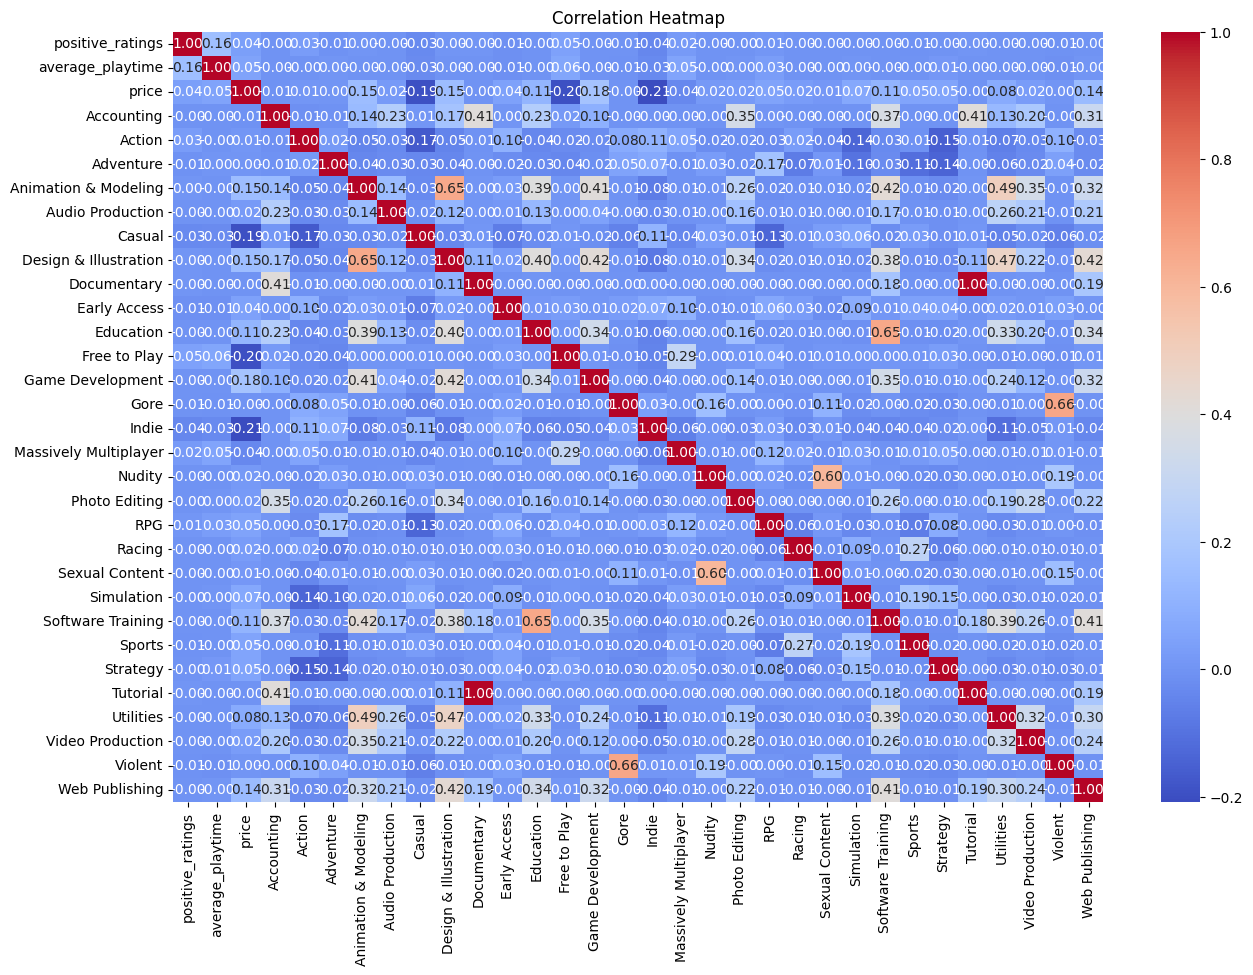

In [ ]:
# Pilih kolom yang relevan untuk analisis korelasi
columns_to_analyze = ['positive_ratings', 'average_playtime', 'price'] + list(encoded_df.columns)

# Subset data untuk kolom yang relevan
heatmap_data = data_encoded[columns_to_analyze]

# Hitung korelasi
correlation_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Dari hasil correlation heatmap diatas, didapatkan bahwa :
1. Game yang memiliki genre Indie, Casual, dan Free to Play menunjukan bahwa mereka memiliki harga yang rendah / gratis
2. Game yang Free to Play cenderung memiliki average_playtime dan positive ratings yang tinggi
3. Game bergenre 'Violent' selalu bersamaan dengan genre 'Gore'
4. Banyak game yang bergenre 'Free to Play' merupakan MMO (Massively Multiplayer)
5. Harga-harga software seperti Edukasi, Animasi, dll cenderung memiliki harga yang tinggi.

Penerapan Dbscan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Menggunakan data genre yang sudah di-encode
X = encoded_df.values

# Standarisasi data untuk memastikan semua fitur memiliki skala yang sama
X_scaled = StandardScaler().fit_transform(X)

# Terapkan DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Tambahkan hasil clustering ke dalam DataFrame
data_encoded['cluster'] = clusters

# Menampilkan hasil clustering
print(data_encoded[['name', 'cluster']].head(79))

print(f"Jumlah cluster yang terbentuk: {len(set(clusters)) - (1 if -1 in clusters else 0)}")
print(f"Jumlah outlier (noise): {list(clusters).count(-1)}")


                         name  cluster
0              Counter-Strike        0
1       Team Fortress Classic        0
2               Day of Defeat        0
3          Deathmatch Classic        0
4   Half-Life: Opposing Force        0
..                        ...      ...
74        X3: Terran Conflict       12
75     X: Beyond the Frontier       13
76                 X: Tension       13
77                  X Rebirth       14
78       688(I) Hunter/Killer        6

[79 rows x 2 columns]
Jumlah cluster yang terbentuk: 399
Jumlah outlier (noise): 1768


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

best_score = -1
best_params = None

# Eksperimen dengan berbagai nilai eps dan min_samples
for eps_value in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    for min_samples_value in [5, 10, 15, 20]:
        dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        clusters = dbscan.fit_predict(X_scaled)
        if len(set(clusters)) > 1:
            score = silhouette_score(X_scaled, clusters)
            if score > best_score:
                best_score = score
                best_params = (eps_value, min_samples_value)

print(f"Best Score: {best_score}, Best Parameters: {best_params}")


Best Score: 0.8880794789648191, Best Parameters: (0.5, 5)


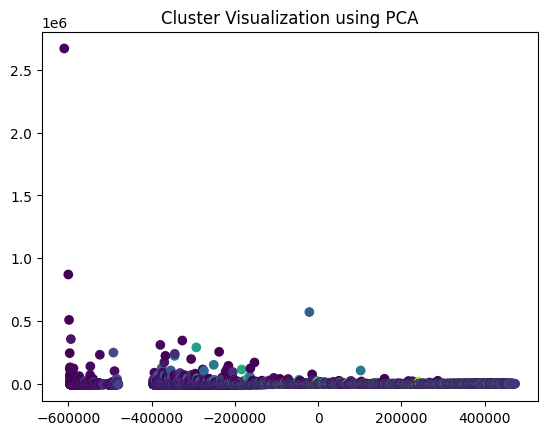

In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Reduksi dimensi dengan PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(X_scaled)

# # Plot hasil clustering
# plt.figure(figsize=(10, 6))
# plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
# plt.title("DBSCAN Clustering Results")
# plt.colorbar(label='Cluster')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.show()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
numeric_columns = data_encoded.select_dtypes(include=['number']).columns
numeric_data = data_encoded[numeric_columns]

labels = data_encoded['cluster']

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_data)

# Plot hasil PCA dengan cluster
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=labels, cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.show()



In [ ]:
# Misalnya 'data' adalah dataframe yang sudah diberi label cluster
data['cluster'] = labels  # Menambahkan hasil clustering ke dalam data

# Simpan dataset yang sudah di-cluster ke dalam CSV baru
data.to_csv("dbscan_clustered_games_final_final.csv", index=False)